In [1]:
#http://myinspirationinformation.com/uncategorized/audio-signals-in-python/
#https://stackoverflow.com/questions/43963982/python-change-pitch-of-wav-file

%matplotlib inline

In [2]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

# Open the files.

wr = wave.open('imperial_march.wav', 'r')

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


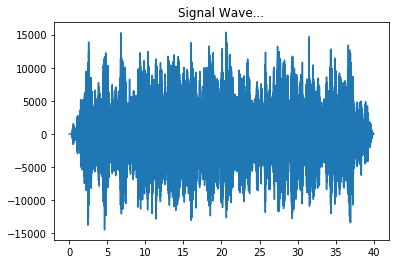

In [3]:
wr_copy = wave.open('imperial_march.wav', 'r')
#Extract Raw Audio from Wav File
signal = wr_copy.readframes(-1)
signal = np.fromstring(signal, 'Int16')
fs = wr_copy.getframerate()

Time=np.linspace(0, len(signal)/fs, num=len(signal))

plt.figure(1)
plt.title('Signal Wave...')
plt.plot(Time,signal)


/srv/conda/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Amplitude')

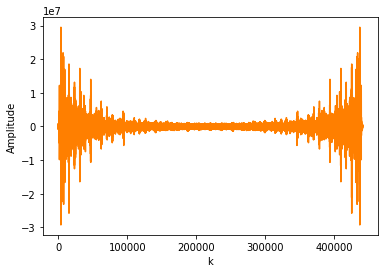

In [4]:
from numpy import fft as fft
left, right = signal[0::2], signal[1::2]  # left and right channel
fourier=fft.fft(left)

plt.plot(fourier, color='#ff7f00')
plt.xlabel('k')
plt.ylabel('Amplitude')


In [5]:
# Set the parameters for the output file.
par = list(wr.getparams())
par[3] = 0  # The number of samples will be set by writeframes.
par = tuple(par)
ww = wave.open('modified_imperial_march.wav', 'w')
ww.setparams(par)

# The sound should be processed in small fractions of a second. This cuts down on reverb. 
# Try setting  fr to 1; you'll hear annoying echos.

fr = 20
sz = wr.getframerate()//fr  # Read and process 1/fr second at a time.

# A larger number for fr means less reverb.

c = int(wr.getnframes()/sz)  # count of the whole file
shift = 1000//fr  # shifting 100 Hz

for num in range(c):
# Read the data, split it in left and right channel (assuming a stereo WAV file).

    da = np.fromstring(wr.readframes(sz), dtype=np.int16)
    left, right = da[0::2], da[1::2]  # left and right channel

    # Extract the frequencies using the Fast Fourier Transform built into numpy.
        
    lf, rf = np.fft.rfft(left), np.fft.rfft(right)
                                            
    # Roll the array to increase the pitch.

    lf, rf = np.roll(lf, shift), np.roll(rf, shift)

    # The highest frequencies roll over to the lowest ones. That's not what we want, so zero them.

    lf[0:shift], rf[0:shift] = 0, 0

    # Now use the inverse Fourier transform to convert the signal back into amplitude.

    nl, nr = np.fft.irfft(lf), np.fft.irfft(rf)

    # Combine the two channels.

    ns = np.column_stack((nl, nr)).ravel().astype(np.int16)

    # Write the output data.

    ww.writeframes(ns.tostring())

# Close the files when all frames are processed.

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [6]:
wr.close()
ww.close()

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


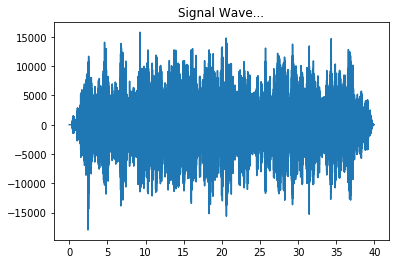

In [7]:
wr_copy2 = wave.open('modified_imperial_march.wav', 'r')
#Extract Raw Audio from Wav File
signal2 = wr_copy2.readframes(-1)
signal2 = np.fromstring(signal2, 'Int16')
fs2 = wr_copy2.getframerate()

time2=np.linspace(0, len(signal2)/fs2, num=len(signal2))

plt.figure(1)
plt.title('Signal Wave...')
plt.plot(time2,signal2)

#plt.plot(Time,signal)


/srv/conda/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Amplitude')

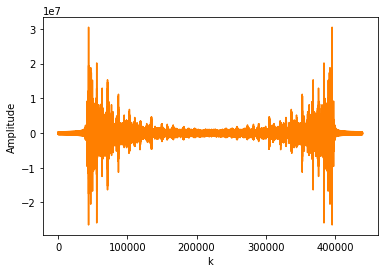

In [8]:
from numpy import fft as fft
left, right = signal2[0::2], signal2[1::2]  # left and right channel
fourier=fft.fft(left)

plt.plot(fourier, color='#ff7f00')
plt.xlabel('k')
plt.ylabel('Amplitude')


In [9]:
wr_copy.close()
wr_copy2.close()